<a href="https://colab.research.google.com/github/Graviton12/In-Class-Classification-Assignment/blob/main/Classification_In_class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [ ]:
# importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries needed spitting data and building pipelines
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# importing models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# importing metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error

## 2. Load the titanic dataset from seaborn

In [ ]:
# loading the dataset
titanic = sns.load_dataset('titanic')

In [ ]:
# viewing the top rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [ ]:
# viewing the dhape of the dataset
titanic.shape # There are 891 rows and 15 columns

(891, 15)

Question 2: Are there any missing values?

In [ ]:
# chekcing for missing values
titanic.isnull().sum() # Yes there are missing values for age, embarked, deck, and embark_town

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

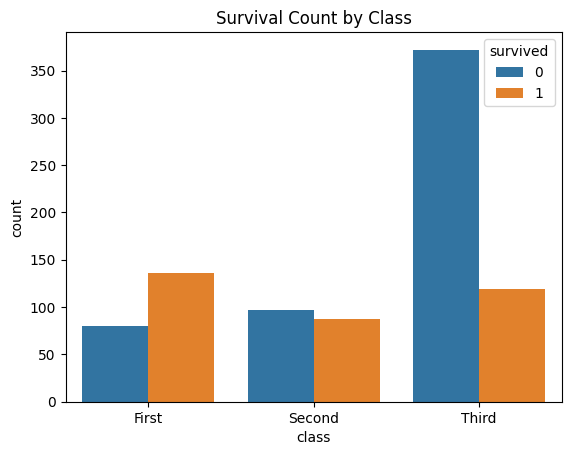

In [ ]:
# visualizing the survival rate based on different classes
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Survival Count by Class')
plt.show()

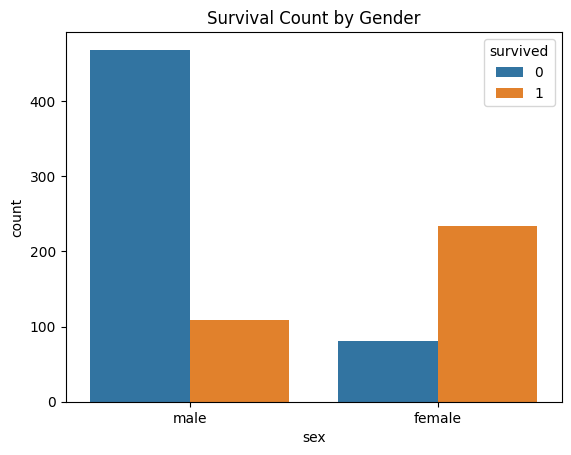

In [ ]:
# visualizing the survival rate based on gender
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Count by Gender')
plt.show()

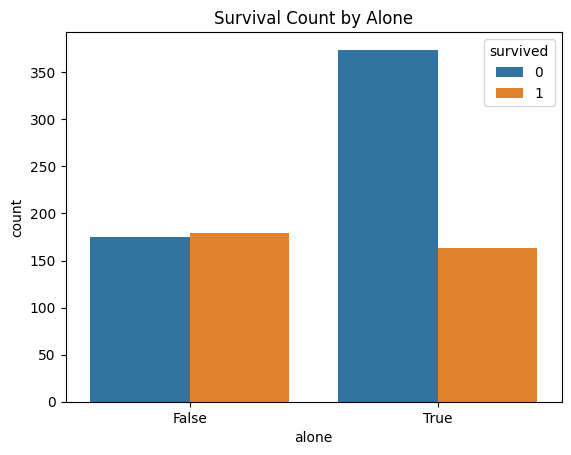

In [ ]:
# visualizing the survival rate based on alone
sns.countplot(x='alone', hue='survived', data=titanic)
plt.title('Survival Count by Alone')
plt.show()

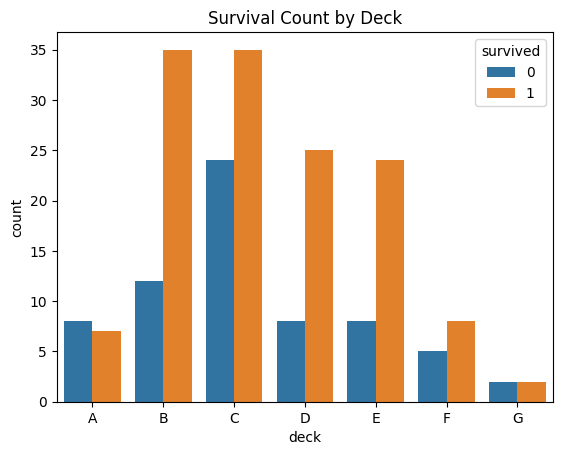

In [ ]:
# visualizing the survival rate based on deck
sns.countplot(x='deck', hue='survived', data=titanic)
plt.title('Survival Count by Deck')
plt.show()

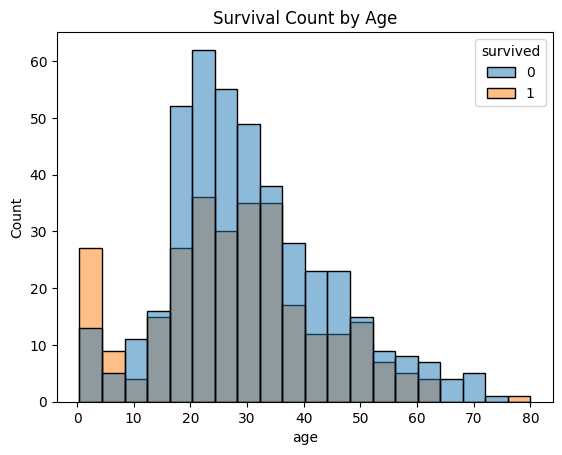

In [ ]:
# visualzing survival count by age
sns.histplot(x='age', hue='survived', data=titanic)
plt.title('Survival Count by Age')
plt.show()

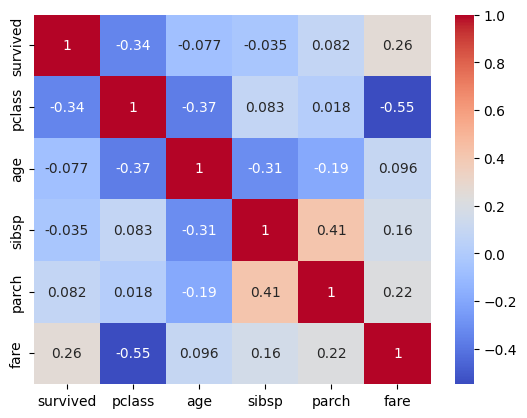

In [ ]:
# extracting the numerical features
numerical_columns = titanic.select_dtypes(include=['int64', 'float64']).columns
# creating a heatmap using only the numerical features
sns.heatmap(titanic[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

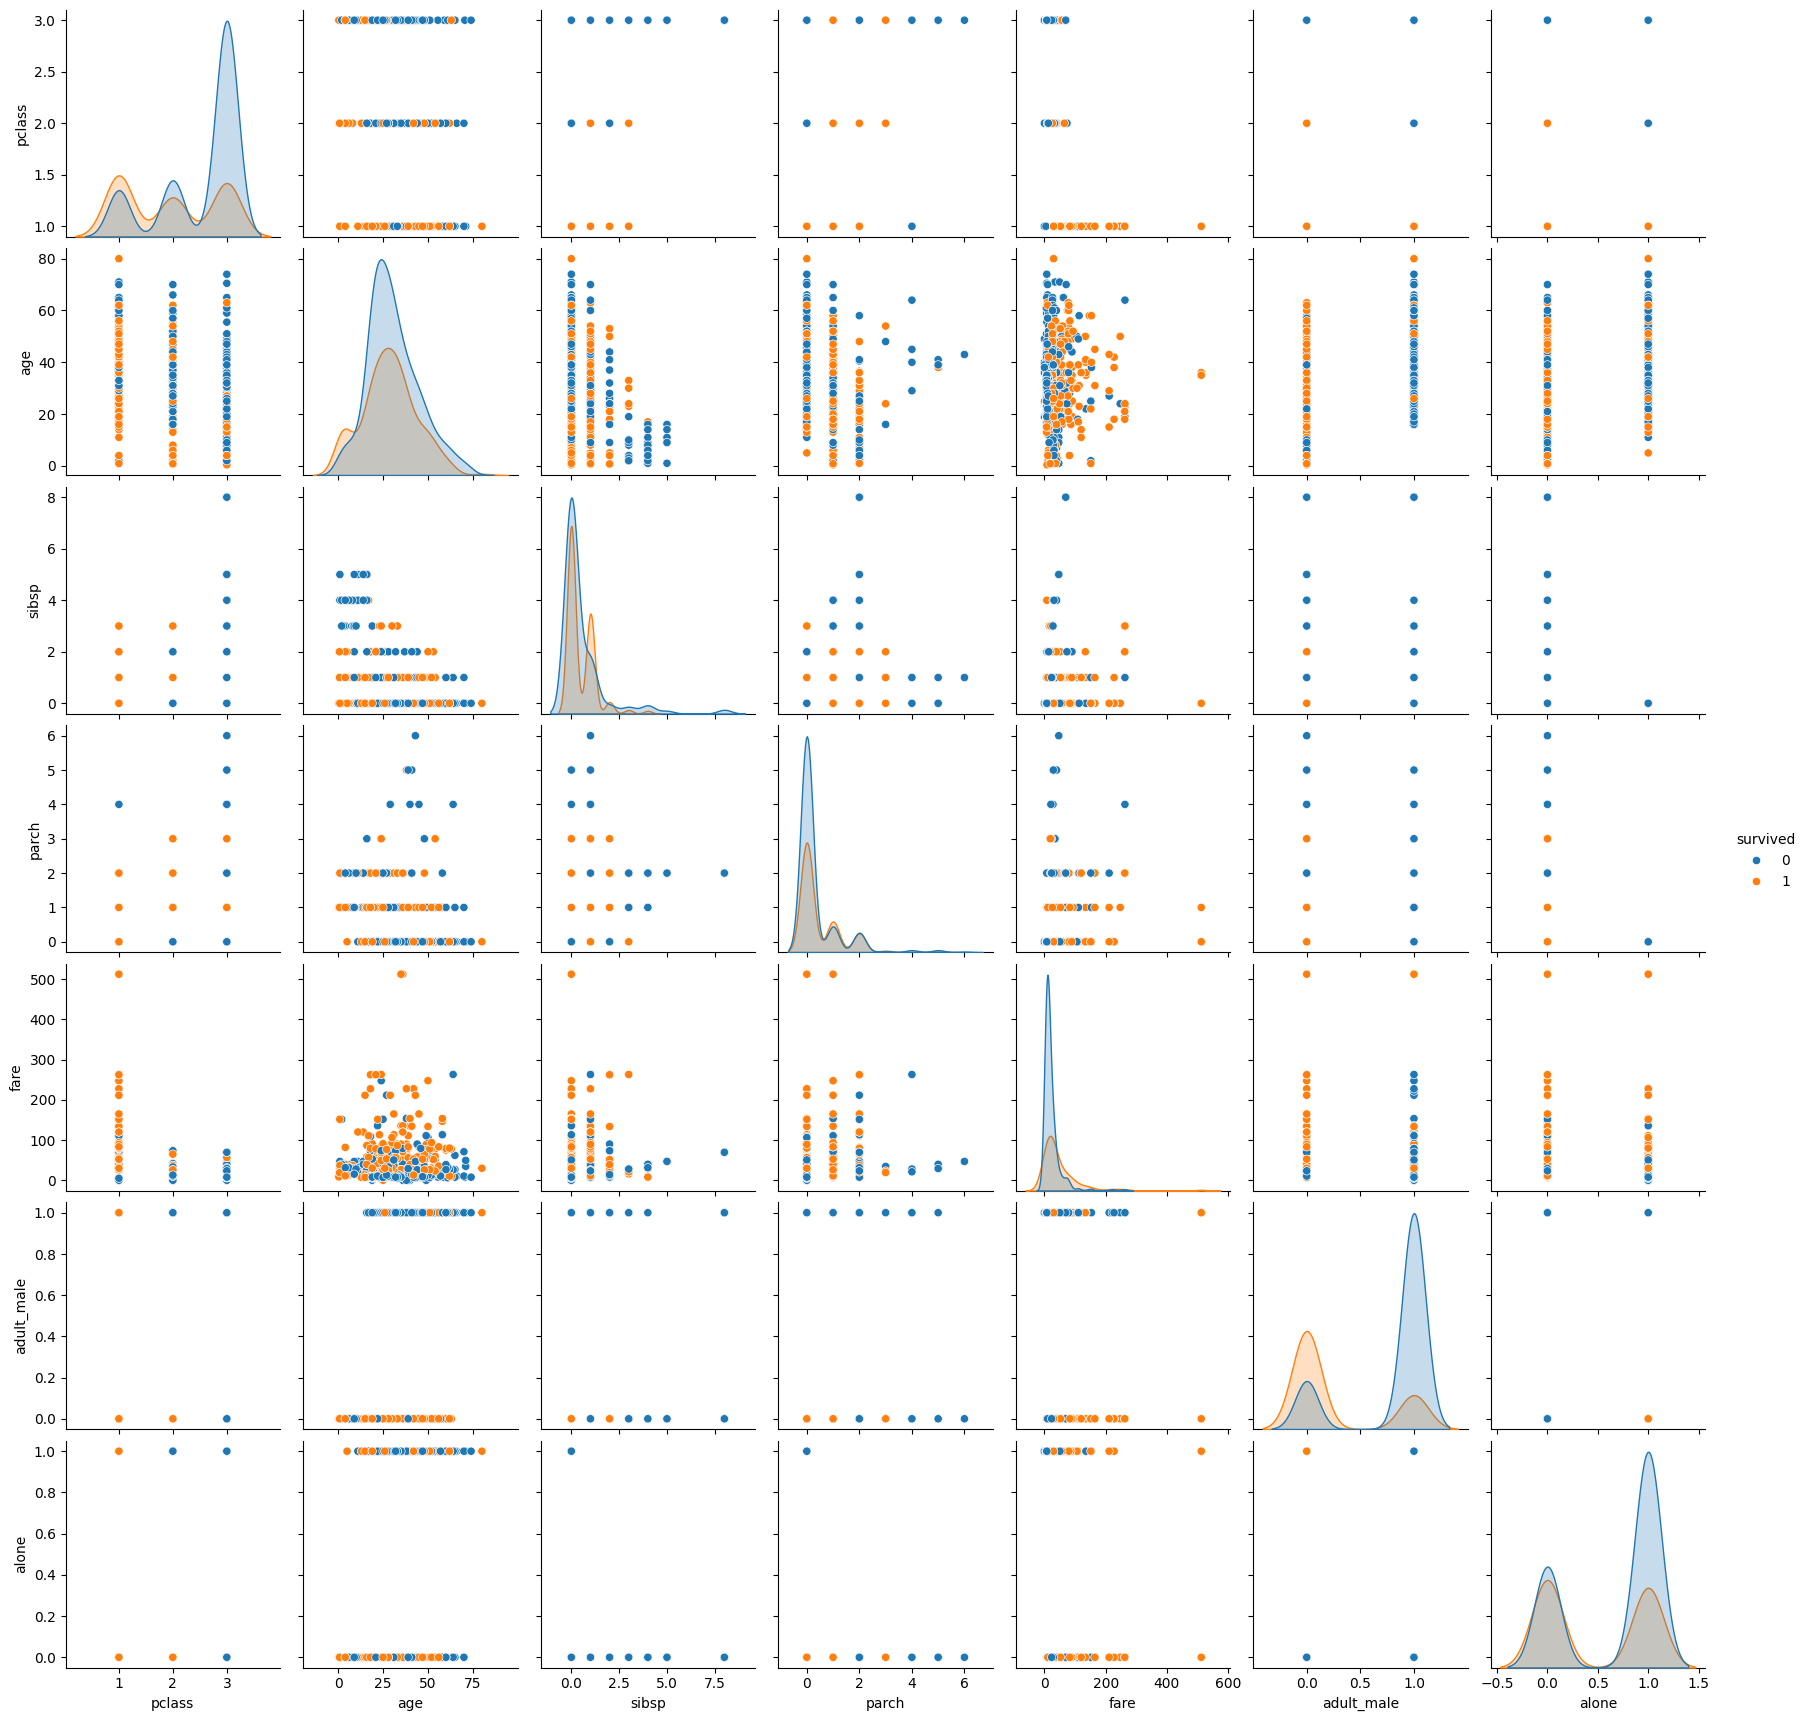

In [ ]:
# creating a pairplot
sns.pairplot(titanic, hue='survived')
plt.show()

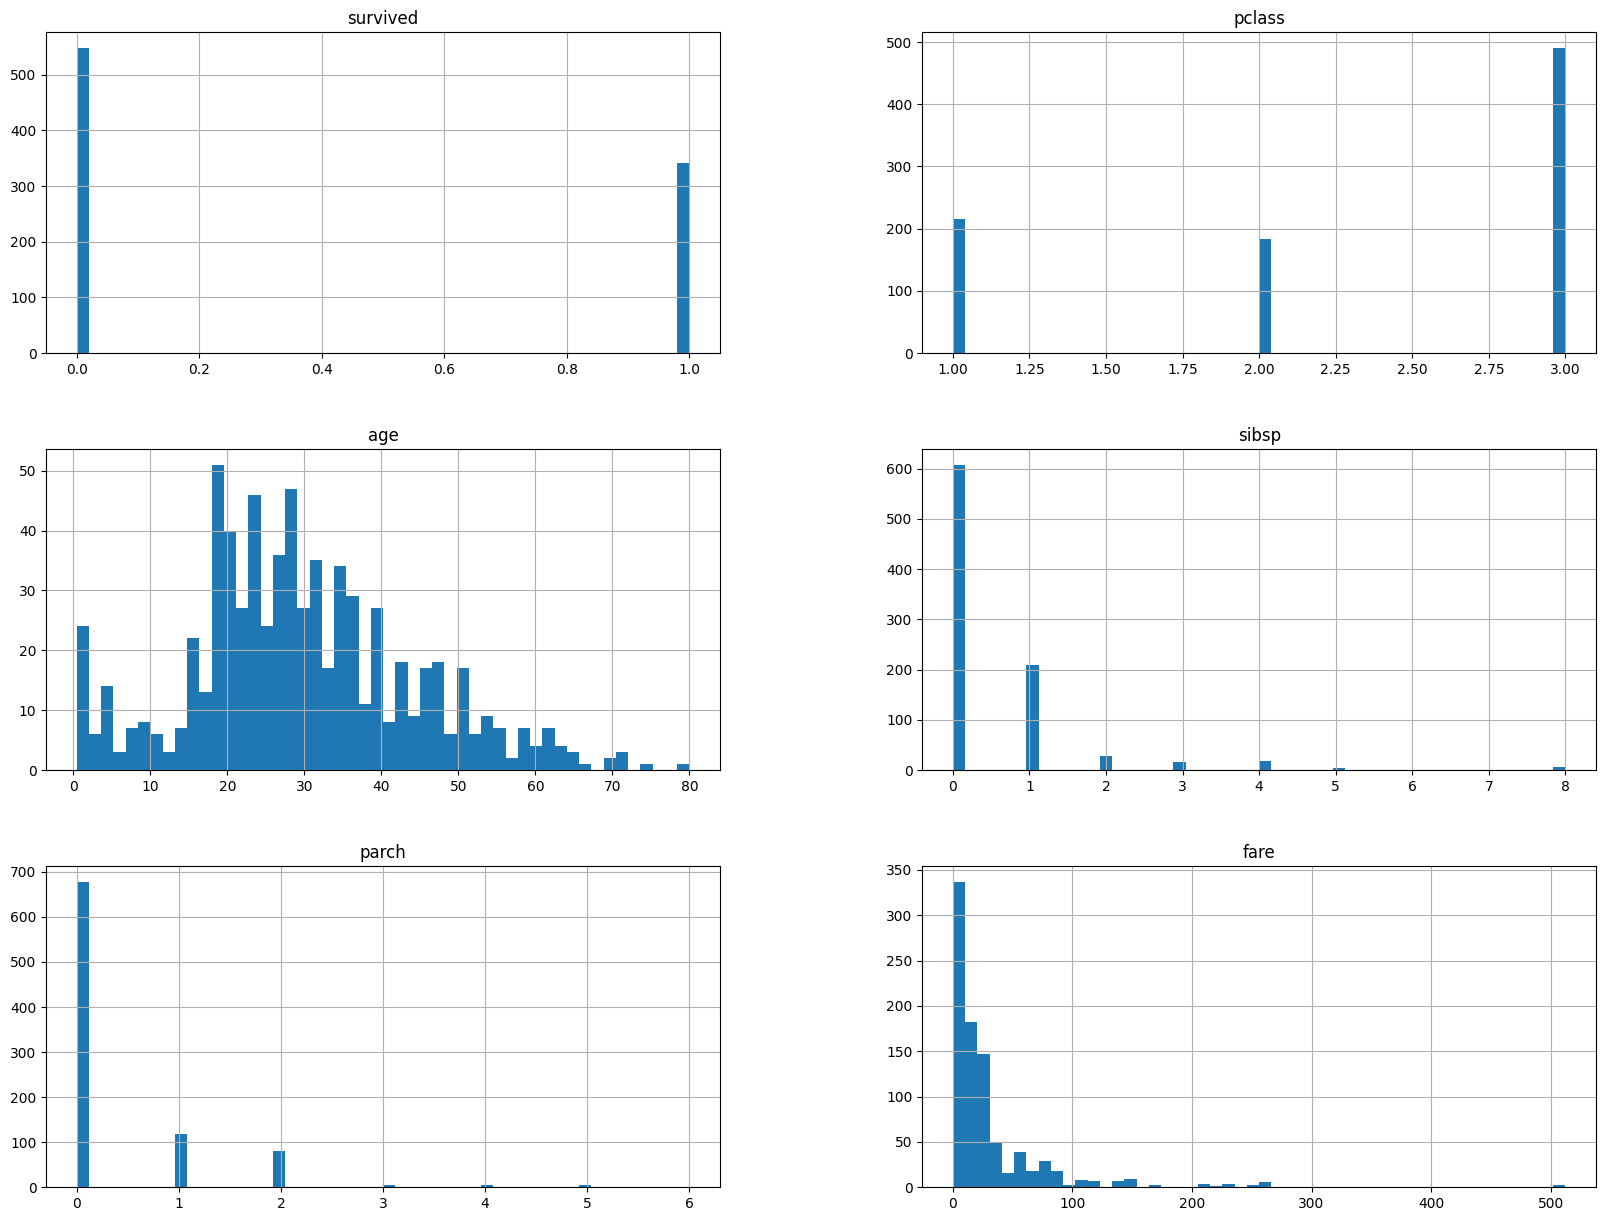

In [ ]:
# creating histograms to view the distribution for numerical columns
titanic.hist(bins=50, figsize=(20,15))
plt.show()

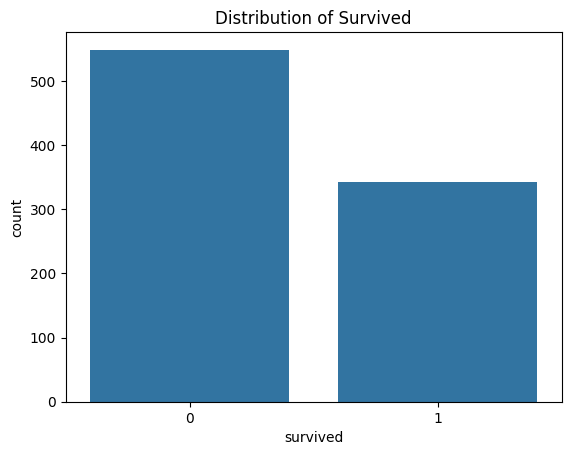

In [ ]:
# viewing the distribution of survived
sns.countplot(x='survived', data=titanic)
plt.title('Distribution of Survived')
plt.show()

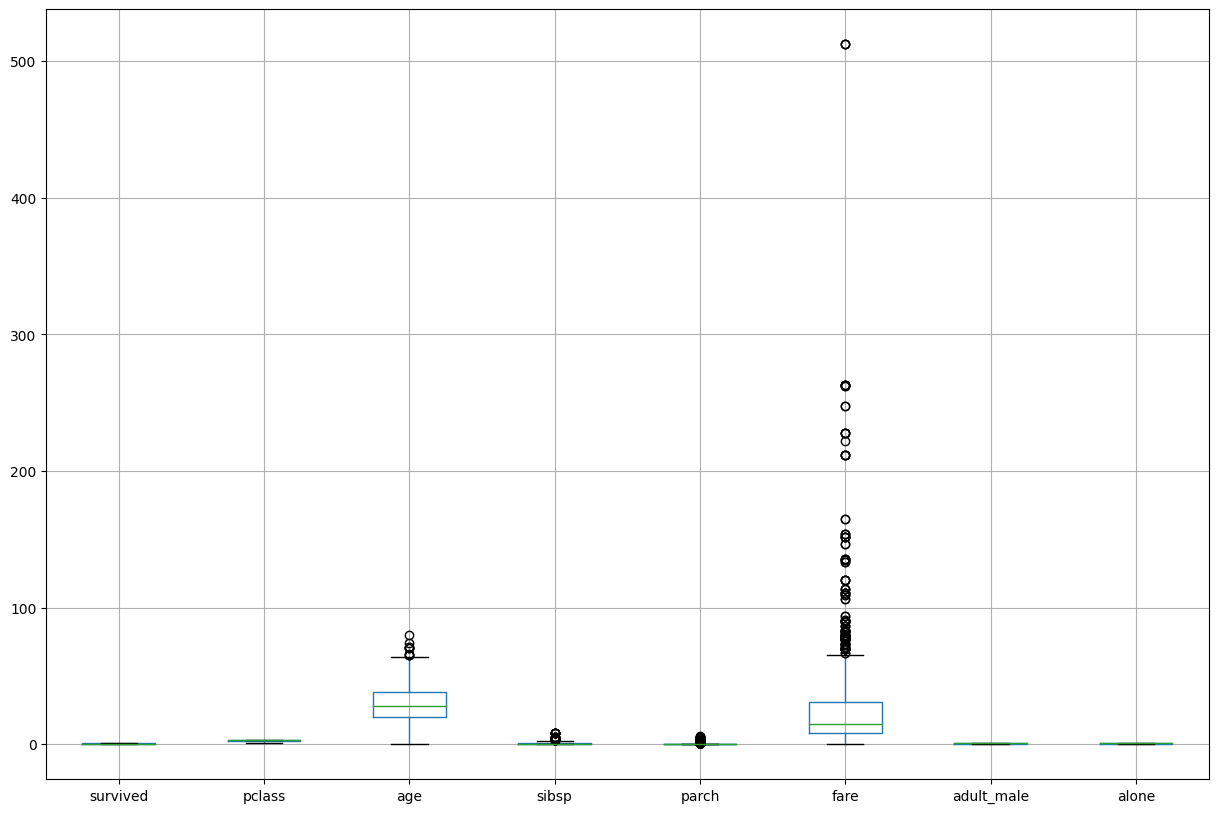

In [ ]:
# creating a boxplot to see if there are any outiers present for all numerical columns
titanic.boxplot(figsize=(15,10))
plt.show()

In [ ]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']


### Split the data into training and testing sets

In [ ]:
# splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [ ]:
# extracting the numerical features
numerical_features = ['age','fare','pclass']
# extracting the categorical features
categorical_features = ['sex','embarked','who','alone']

In [ ]:
# creating a column transformer where standard scaler is used numerical features and missing values are imputed with mean
numerical_transformer = Pipeline(steps=[
    ('num', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean'))
])

# creating a column transformer where one hot encoder us used for categorical features and missing values imputer with mode
categorical_transformer = Pipeline(steps=[
    ('cat', OneHotEncoder()),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [ ]:
# creating a pipeline and combining the column transformer preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num', StandardScaler()),
                                                 ('imputer', SimpleImputer())]),
                                 ['age', 'fare', 'pclass']),
                                ('cat',
                                 Pipeline(steps=[('cat', OneHotEncoder()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['sex', 'embarked', 'who', 'alone'])])

## Training data with multiple models

In [ ]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8268156424581006

Model: Logistic Regression
Accuracy: 0.8100558659217877

Model: Decision Tree
Accuracy: 0.7653631284916201

Model: Random Forest
Accuracy: 0.8212290502793296

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.7988826815642458

Model: Gradient Boosting
Accuracy: 0.8268156424581006


The K-nearest neighbors and gradient boosting have the greatest accuracy.

#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
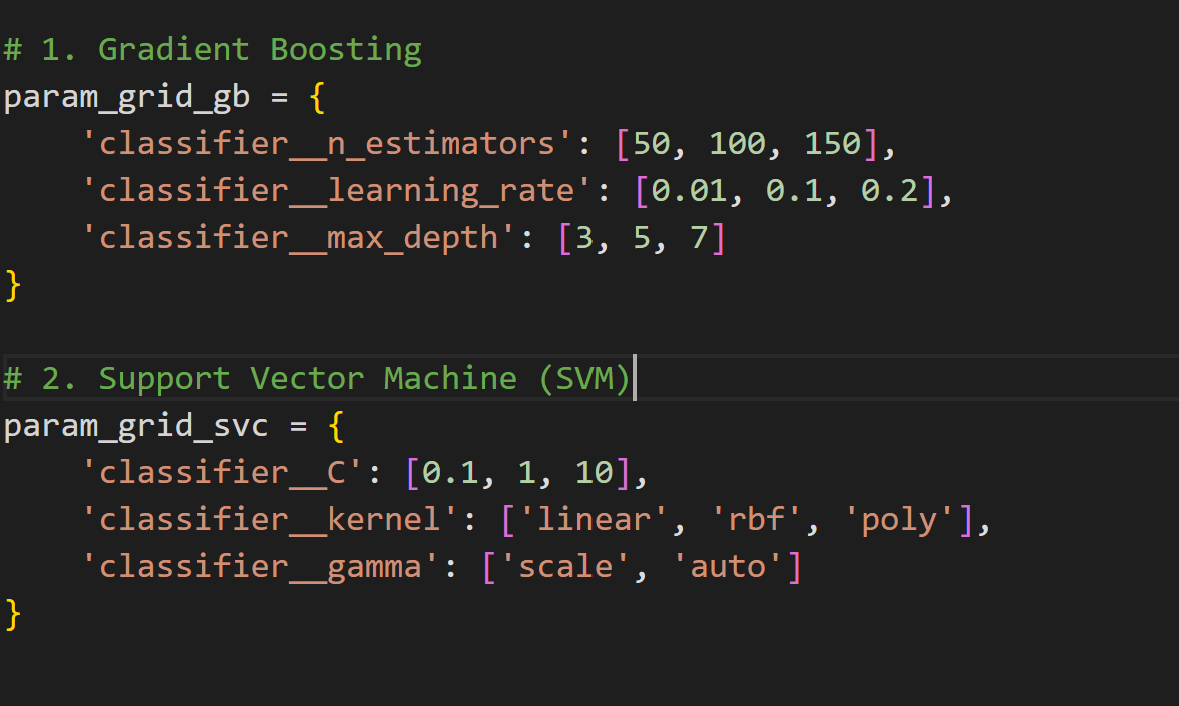

In [ ]:
# 1. K-Nearest Neighbor
param_grid_knn = {
    'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# 2. Gradient Boosting
param_grid_gb = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 6, 8, 10]
}

## List of models and their corresponding parameter grids
Example
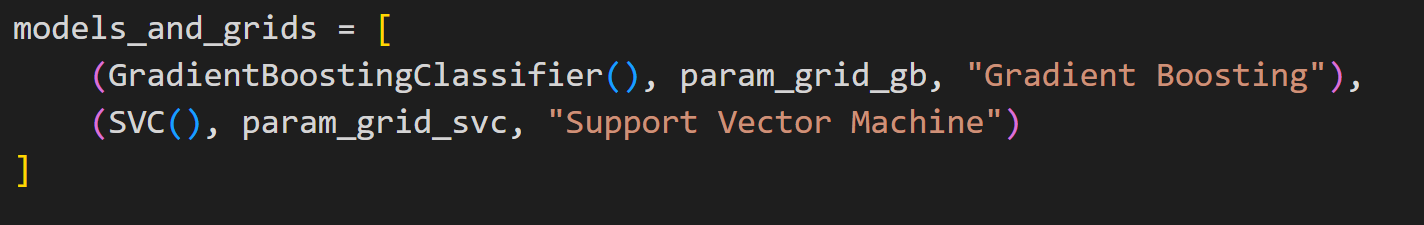

In [ ]:
models_and_grids = [
    (KNeighborsClassifier(), param_grid_knn, 'K Nearest Neighbors'),
    (GradientBoostingClassifier(), param_grid_gb, 'Gradient Boosting')
]

In [ ]:
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for K Nearest Neighbors: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 12, 'classifier__weights': 'uniform'}
Best cross-validation accuracy for K Nearest Neighbors: 0.8146

Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best cross-validation accuracy for Gradient Boosting: 0.8244


## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.

1. Based on the initial accuracy score, prior to hypertuning it is clear that K Nearest Neighbors model and Gradient Boosting model had the greatest accuracy score with a value of 0.8268156424581006 each. This implies that both models were 82.68% accurate.

2. Thus, given our accuracy scores, the top two models were K Nearest Neighbors and Gradient Boosting. When applying the hyperparamter tuning however, the accuracy score for both models went down slightly. This meant that the performance for both models got somewhat worse. This may imply that the parameters we set for our grid were not the most optimal paramters. However, overall it seems as though the tuning did not significantly effect the accuracy of both models.

3. The accuracy score for the KNN model prior to tuning was 82.68%. After tuning, the accuracy score dropped slightly to 81.46%. Thus, the hypertuning did not seem to have a drastic effect on KNN. The accuracy score for the Gradient Boosting model prior to tuning was 82.68%. However, after tuning, the accuracy went down to 82.44%. Thus, the model performed sightly worse but the tuning did not effect the Gradient boosting model much. Overall it seems as though the tuning had a greated impact on KNN model than the Gradient Boosting. Through this, we can conclude that the Gradient Boosting showed the greatest improvement.

4. ....

5. ....

6. ....